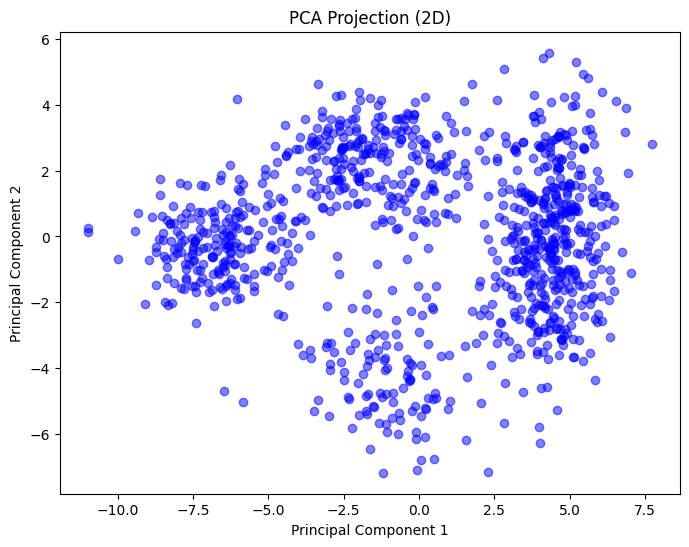

f:\4-2 Courses\ML Sessional\Offline4\1905054\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


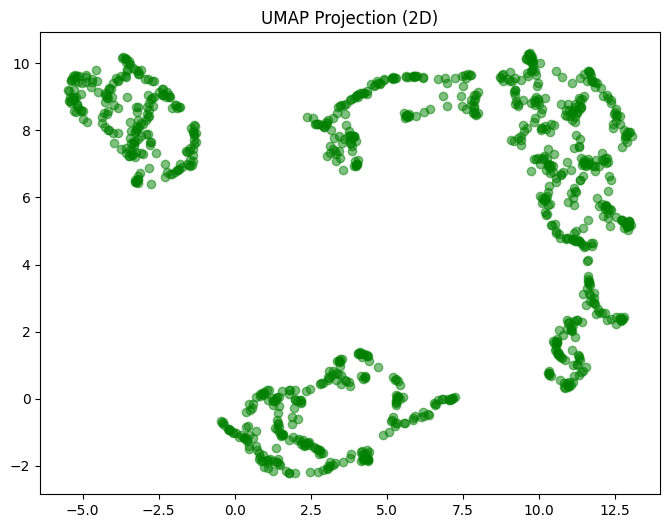

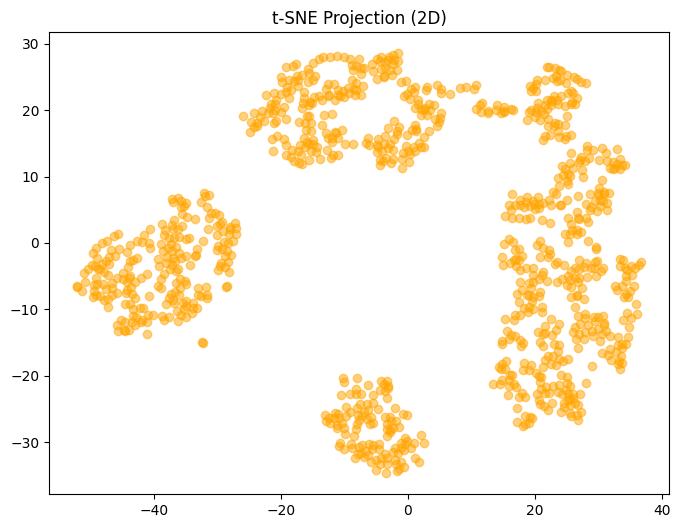

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap 

pca_data = np.loadtxt("pca_data.txt")  

def perform_pca(data, n_components=2):
    
    mean_data = np.mean(data, axis=0)
    centered_data = data - mean_data
 
    covariance_matrix = np.cov(centered_data, rowvar=False)
  
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
 
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
 
    top_eigenvectors = eigenvectors[:, :n_components]
    projected_data = np.dot(centered_data, top_eigenvectors)

    return projected_data, top_eigenvectors, eigenvalues

pca_projected_data, eigenvectors, eigenvalues = perform_pca(pca_data)


plt.figure(figsize=(8, 6))
plt.scatter(pca_projected_data[:, 0], pca_projected_data[:, 1], alpha=0.5, c='blue')
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data)
plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.5, c='green')
plt.title("UMAP Projection (2D)")
plt.show()


tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(pca_data)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.5, c='orange')
plt.title("t-SNE Projection (2D)")
plt.show()


In [9]:
from scipy.special import factorial

em_data = np.loadtxt("em_data.txt")  

np.random.seed(42)
lambda1, lambda2 = np.random.uniform(1, 10, 2) 
pi1, pi2 = 0.5, 0.5  
tolerance = 1e-6  
max_iterations = 100  

# EM Algorithm
for iteration in range(max_iterations):
    
    p1 = pi1 * (np.exp(-lambda1) * (lambda1 ** em_data) / factorial(em_data))
    p2 = pi2 * (np.exp(-lambda2) * (lambda2 ** em_data) / factorial(em_data))
    gamma1 = p1 / (p1 + p2)  
    gamma2 = 1 - gamma1  

    
    lambda1_new = np.sum(gamma1 * em_data) / np.sum(gamma1)
    lambda2_new = np.sum(gamma2 * em_data) / np.sum(gamma2)
    pi1_new = np.mean(gamma1)
    pi2_new = 1 - pi1_new

    
    if (abs(lambda1 - lambda1_new) < tolerance and
        abs(lambda2 - lambda2_new) < tolerance and
        abs(pi1 - pi1_new) < tolerance):
        print(f"Converged at iteration {iteration + 1}")
        break

    
    lambda1, lambda2 = lambda1_new, lambda2_new
    pi1, pi2 = pi1_new, pi2_new


print("Estimated Parameters:")
print(f"  Mean (lambda1, families with family planning): {lambda1:.4f}")
print(f"  Mean (lambda2, families without family planning): {lambda2:.4f}")
print(f"  Proportion (pi1, families with family planning): {pi1:.4f}")
print(f"  Proportion (pi2, families without family planning): {pi2:.4f}")


Estimated Parameters:
  Mean (lambda1, families with family planning): 1.7924
  Mean (lambda2, families without family planning): 4.9192
  Proportion (pi1, families with family planning): 0.3589
  Proportion (pi2, families without family planning): 0.6411
